# **Removing warnings**

In [51]:
import warnings
warnings.filterwarnings('ignore')

### This cell imports libraries like yfinance for stock data, numpy, pandas, matplotlib, tensorflow for LSTM model, and other utilities

In [2]:
import yfinance as yf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

2025-05-01 14:03:11.237241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746090191.252365  263448 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746090191.257080  263448 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746090191.268867  263448 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746090191.268886  263448 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746090191.268887  263448 computation_placer.cc:177] computation placer alr

In [3]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# Download BTC-USD daily data 
btc_1d = yf.download('BTC-USD', start='2014-09-17', end='2025-4-30', interval='1d')
btc_1d.to_csv('./data/btc_1d.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data = pd.read_csv('./data/btc_1d.csv', header=[0],parse_dates=['Price'])  # Use the second row as header
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700


In [6]:
data.tail()

,Price,Close,High,Low,Open,Volume
3875,2025-04-25,94720.5,95768.390625,92898.59375,93954.25,40915232364
3876,2025-04-26,94646.9296875,95251.359375,93927.25,94714.6484375,17612825123
3877,2025-04-27,93754.84375,95301.203125,93665.3984375,94660.90625,18090367764
3878,2025-04-28,94978.75,95598.4921875,92860.8046875,93755.3046875,32363449569
3879,2025-04-29,94284.7890625,95485.4140625,93796.6328125,94981.859375,25806129921


In [7]:
data = data.dropna().reset_index(drop=True)
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
2,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
3,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
4,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600


In [8]:
data.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [9]:
data = data.iloc[1:].reset_index(drop=True)

In [10]:
data = data.rename(columns={'Price':'Date'})
data.head()

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
1,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
2,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
3,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
4,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100


In [11]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3878 entries, 0 to 3877
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3878 non-null   object
 1   Close   3878 non-null   object
 2   High    3878 non-null   object
 3   Low     3878 non-null   object
 4   Open    3878 non-null   object
 5   Volume  3878 non-null   object
dtypes: object(6)
memory usage: 181.9+ KB


In [13]:
data.select_dtypes(include=['number'])

# Compare the number of numerical columns with the total columns
if len(data.columns) == len(data.columns):
    print("All columns are numerical.")
else:
    print("Some columns are not numerical.")
    print("Non-numerical columns:", data.select_dtypes(exclude=['number']).columns)


All columns are numerical.


In [14]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

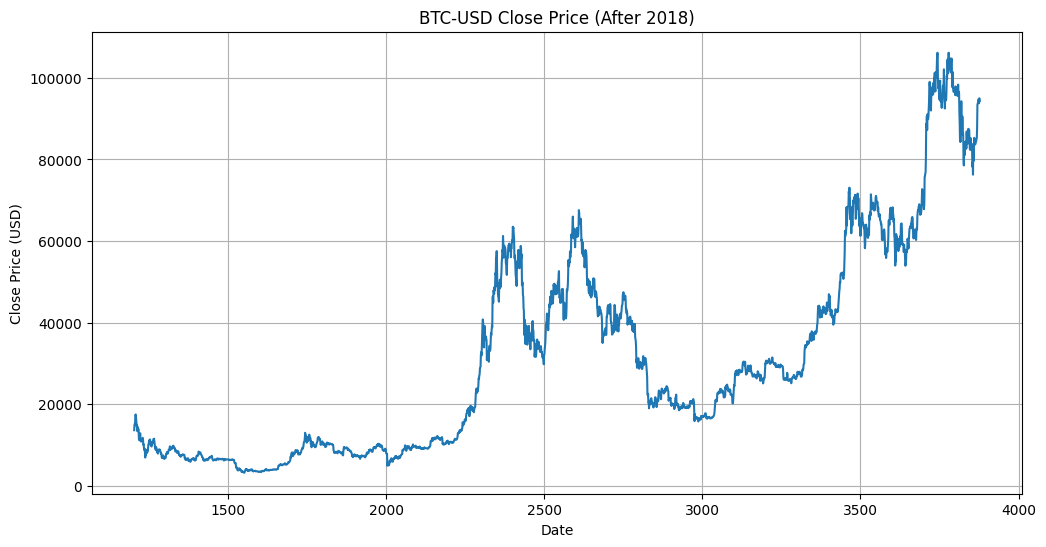

In [15]:
tc_filtered = data[data['Date'] >= '2018-01-01']
tc_filtered['Close'].plot(title='BTC-USD Close Price (After 2018)', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

In [16]:
layout = {
    'xaxis': {
        'title': {
            'text': 'Date',
            'font': {'size': 18}
        }
    },
    'yaxis': {
        'title': {
            'text': 'Close Price',
            'font': {'size': 18}
        }
    }
}

data.iplot(x='Date', y='Close', layout=layout)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [25]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [26]:
X = scaler_X.fit_transform(data[features])
y = scaler_y.fit_transform(data[[target]])

In [27]:
def create_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

time_steps = 60
X_seq, y_seq = create_sequences(X, y, time_steps)

In [29]:
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [30]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3054, 60, 4), (764, 60, 4), (3054, 1), (764, 1))

In [31]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2]))),
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))

2025-05-01 14:10:10.789677: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,347 (278.70 KB)

 Trainable params: 71,347 (278.70 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
board = TensorBoard(log_dir='logs',histogram_freq=1)

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback, board]
)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0037 - val_loss: 1.7178e-04
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 9.9021e-04 - val_loss: 1.5785e-04
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 8.1581e-04 - val_loss: 1.3313e-04
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 7.9741e-04 - val_loss: 1.7191e-04
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 9.0219e-04 - val_loss: 1.2714e-04
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.7220e-04 - val_loss: 1.3256e-04
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 4.8709e-04 - val_loss: 1.1678e-04
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 6.1999e-04 - val_loss: 1.4384e-04
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 5.1049e-04 - val_loss: 1.6999e-04
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 5.4454e-04 - val_loss: 1.3143e-04
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.

In [37]:
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


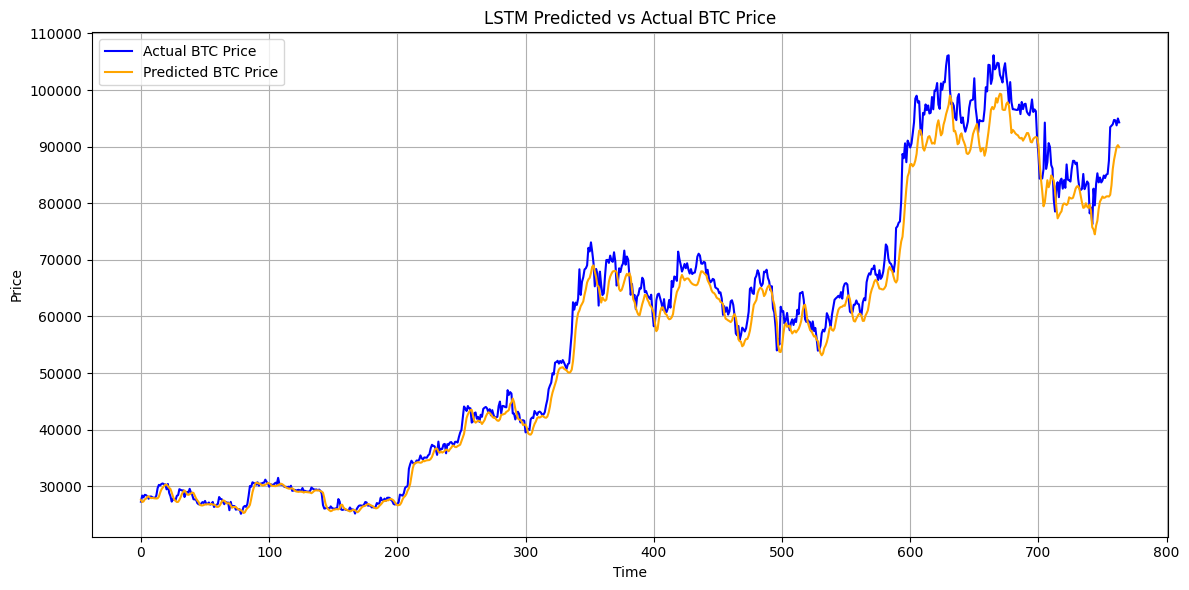

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual BTC Price', color='blue')
plt.plot(y_pred_inv, label='Predicted BTC Price', color='orange')
plt.title('LSTM Predicted vs Actual BTC Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
import pickle
os.makedirs('Result_1',exist_ok=False)

In [45]:
# Example data (replace with your actual variables)
scaler_x = "scaler_x"     # Example scaler for X
scaler_y = "scaler_y"     # Example scaler for Y

with open('Result_1/scaler_x.pkl', 'wb') as f:
    pickle.dump(scaler_x, f)

with open('Result_1/scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

In [50]:
model.save('Result_1/model.h5')